## Load data and browse data

In [712]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [713]:
# Load data from file
#df = pd.read_csv('churn.csv')
df = pd.read_csv('BASEBALL.csv')
df.shape

(192102, 8)

In [714]:
import datetime
df['weekday']=df['Event Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%a'))

In [715]:
# Count missing values by column
df.isnull().sum()

Event Date        0
Opponent          0
Weather           0
Area              0
Section           0
Row               0
Seat          34574
Price            33
weekday           0
dtype: int64

In [716]:
# Name inconsistent
df.loc[df['Opponent'] == 'Nishi Nippon Pirates ','Opponent'] = 'Nishi Nippon Pirates'

# Groupby Game

In [717]:
#get total sold ticket numbers for each game
df['tickets']=1
agg_count=df.groupby(['Event Date', 'Opponent','Weather','weekday']).sum().reset_index() 

In [718]:
agg_count.head()

,Event Date,Opponent,Weather,weekday,Area,Seat,Price,tickets
0,2015/10/10,Nishi Nippon Pirates,Rainy,Sat,10709,25741.0,827900.50,2942
1,2015/10/9,Nishi Nippon Pirates,Cloudy,Fri,9323,22785.0,647294.01,2583
2,2015/6/15,Hiroshima Toyo Carp,Cloudy,Mon,5883,15166.0,179941.29,1998
3,2015/6/16,Hiroshima Toyo Carp,Cloudy,Tue,6338,17423.0,163042.68,2229
4,2015/6/26,Nishi Nippon Pirates,Cloudy,Fri,8306,18333.0,334437.51,2549


In [719]:
#get median price for each game
agg_median=df.groupby(['Event Date', 'Opponent','Weather','weekday']).median().reset_index() 

In [720]:
agg_count['Price_Median']=agg_median['Price']

In [721]:
del agg_count['Area']
del agg_count['Seat']
del agg_count['Price']

In [722]:
agg_count.head()

,Event Date,Opponent,Weather,weekday,tickets,Price_Median
0,2015/10/10,Nishi Nippon Pirates,Rainy,Sat,2942,223.88
1,2015/10/9,Nishi Nippon Pirates,Cloudy,Fri,2583,194.00
2,2015/6/15,Hiroshima Toyo Carp,Cloudy,Mon,1998,48.07
3,2015/6/16,Hiroshima Toyo Carp,Cloudy,Tue,2229,45.62
4,2015/6/26,Nishi Nippon Pirates,Cloudy,Fri,2549,91.72


In [723]:
temp=agg_count.copy()

# Extract Month

In [724]:
# Extract game held Month
temp['Event Date'] = pd.to_datetime(temp['Event Date'])
temp['Month']=temp['Event Date'].apply(lambda x: x.month)

In [725]:
temp.head()

,Event Date,Opponent,Weather,weekday,tickets,Price_Median,Month
0,2015-10-10,Nishi Nippon Pirates,Rainy,Sat,2942,223.88,10
1,2015-10-09,Nishi Nippon Pirates,Cloudy,Fri,2583,194.00,10
2,2015-06-15,Hiroshima Toyo Carp,Cloudy,Mon,1998,48.07,6
3,2015-06-16,Hiroshima Toyo Carp,Cloudy,Tue,2229,45.62,6
4,2015-06-26,Nishi Nippon Pirates,Cloudy,Fri,2549,91.72,6


In [726]:
temp['Month'].value_counts()

7     17
5     17
9     15
8     12
6     11
4     11
10     2
Name: Month, dtype: int64

In [727]:
del temp['Event Date']

# Final training data

In [728]:
final_data=temp.copy()
final_data.head()

,Opponent,Weather,weekday,tickets,Price_Median,Month
0,Nishi Nippon Pirates,Rainy,Sat,2942,223.88,10
1,Nishi Nippon Pirates,Cloudy,Fri,2583,194.00,10
2,Hiroshima Toyo Carp,Cloudy,Mon,1998,48.07,6
3,Hiroshima Toyo Carp,Cloudy,Tue,2229,45.62,6
4,Nishi Nippon Pirates,Cloudy,Fri,2549,91.72,6


In [729]:
final_data.shape

(85, 6)

# Clean Categorical Data

In [730]:
col_category = ['Opponent', 'Weather', 'weekday','Month']
df_dummies = pd.get_dummies(final_data[col_category], columns=col_category)
final_data = final_data.join(df_dummies)
final_data.drop(col_category,axis=1,inplace=True)

In [731]:
final_data.head()

,tickets,Price_Median,Opponent_Chiba Lotte Marines,Opponent_Chunichi Dragons,Opponent_Daiei Unions,Opponent_Fukuoka SoftBank Hawks,Opponent_Hanshin Tigers,Opponent_Hiroshima Toyo Carp,Opponent_Hokkaido Nippon-Ham Fighters,Opponent_Nagoya Golden Dolphins,...,weekday_Thu,weekday_Tue,weekday_Wed,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10
0,2942,223.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2583,194.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1998,48.07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2229,45.62,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2549,91.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Fit Model

In [732]:
from sklearn.cross_validation import train_test_split
y = final_data['tickets'].values
X1=final_data.drop('tickets', axis=1)
X=X1.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# DecisionTreeRegressor with GridSearch

In [733]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()
grid_GBC = {
     
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
grid_obj = GridSearchCV(regressor1, param_grid=grid_GBC, scoring='mean_squared_error', n_jobs=-1)                 
grid_obj.fit(X_train, y_train)
print('best_estimator:',grid_obj.best_estimator_)
print("Mean squared error: %.2f"
      % np.mean((grid_obj.best_estimator_.predict(X_test) - y_test) ** 2))

('best_estimator:', DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=9, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))
Mean squared error: 62912.77


In [735]:
#plot tree
from sklearn import tree
dotfile = open("my_tree_added.dot", 'w')
tree.export_graphviz(grid_obj.best_estimator_, out_file = dotfile, feature_names = X1.columns)
dotfile.close()

In [736]:
system(dot -Tpng my_tree_added.dot -o my_tree_added.png)

SyntaxError: invalid syntax (<ipython-input-736-434a5bacbf17>, line 1)

In [ ]:
# Feature Importance
print pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X1.columns).sort(['Imp'], ascending = False)

# Linear Regresssion with Ridge and GridSearch

In [741]:
from sklearn import linear_model
regressor2 = linear_model.Ridge(normalize=1)
grid_LR = {
     
    'alpha':np.linspace(0, 1, 101)
}
grid_obj = GridSearchCV(regressor2, param_grid=grid_LR, scoring='mean_squared_error', n_jobs=-1)                 
grid_obj.fit(X_train, y_train)
print('best_estimator:',grid_obj.best_estimator_)
print("Mean squared error: %.2f"
      % np.mean((grid_obj.best_estimator_.predict(X_test) - y_test) ** 2))

('best_estimator:', Ridge(alpha=0.57000000000000006, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=1, random_state=None, solver='auto', tol=0.001))
Mean squared error: 58262.00


In [742]:
print grid_obj.best_estimator_.coef_

[   2.20973694 -357.11775978   48.48347188  -92.56468899  274.3835001
  713.71271781  -73.14531684    0.          -18.94554443   80.02327126
 -197.24368445 -132.86919963   60.36698325  -29.76925677   47.53431605
 -168.60107232   11.03027324  117.03072051   20.29461389   53.69643779
  -37.00088716   -3.84490151  -26.52812879  134.07572719  117.98403197
   22.67646407  -54.52435596 -153.79654541  135.60027084  -12.6673334
   -2.24936367   16.70638967 -233.12653966   73.97579446  -56.43174207]


# Linear Regresssion with Lasso and GridSearch

In [739]:
from sklearn import linear_model
regressor3 = linear_model.Lasso(normalize=1)

grid_LR = {   
    'alpha':np.linspace(0, 10, 101)
}
grid_obj = GridSearchCV(regressor3, param_grid=grid_LR, scoring='mean_squared_error', n_jobs=-1)                 
grid_obj.fit(X_train, y_train)
print(grid_obj.best_estimator_)
print("Mean squared error: %.2f"
      % np.mean((grid_obj.best_estimator_.predict(X_test) - y_test) ** 2))

/Users/miaopeng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/miaopeng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/miaopeng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/miaopeng/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/miaopeng/anaconda/l

Lasso(alpha=5.4000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=1, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Mean squared error: 72743.99


In [740]:
print grid_obj.best_estimator_.coef_

[   2.90120952 -460.35695339    0.          -33.84174047  262.3419417
  732.54301311   -0.            0.            0.            0.           -0.
  -13.45596026    0.           -0.            0.          -50.29848028
    0.           60.30563327    0.            0.           -0.           -0.
   -0.           78.22395185   51.98129344   -0.           -0.
 -122.46351274  105.92321842    0.           -0.           -0.
 -387.24985507    7.28962635   -0.        ]


# Add Interaction Features and Fit Ridge Regression

In [743]:
from sklearn.preprocessing import PolynomialFeatures
y = final_data['tickets'].values
X1=final_data.drop('tickets', axis=1)
X=X1.values

X_poly = PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.30, random_state=42)

In [744]:
from sklearn import linear_model
regressor4 = linear_model.Ridge(normalize=1)
grid_LR = { 
    'alpha':np.linspace(0, 1, 60)
}
grid_obj = GridSearchCV(regressor4, param_grid=grid_LR, scoring='mean_squared_error', n_jobs=-1)                 
grid_obj.fit(X_train_poly, y_train_poly)
print('best_estimator:',grid_obj.best_estimator_)
print("Mean squared error: %.2f"
      % np.mean((grid_obj.best_estimator_.predict(X_test_poly) - y_test_poly) ** 2))

('best_estimator:', Ridge(alpha=0.23728813559322035, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=1, random_state=None, solver='auto', tol=0.001))
Mean squared error: 67349.85


# So linear regression with rigde penalty has the lowest MSE

# Some Data Exploration
## 1. Ticket trend vs time

/Users/miaopeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


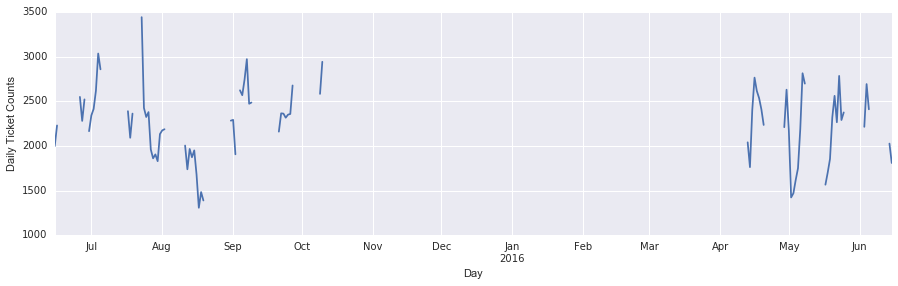

In [745]:
copy = agg_count.copy()
copy['Event Date'] = pd.to_datetime(copy['Event Date'])
copy=copy.sort('Event Date')
copy = copy.set_index('Event Date')
daily = copy['tickets'].resample('D').sum().plot(figsize = (15, 4))
plt.ylabel('Daily Ticket Counts')
plt.xlabel('Day')

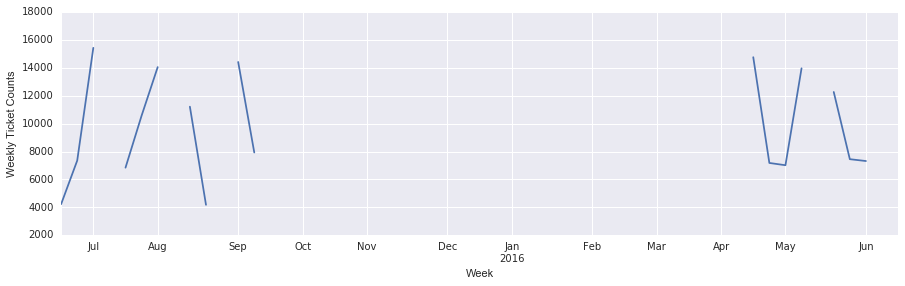

In [746]:
weekly = copy['tickets'].resample('W').sum().plot(figsize = (15, 4))
plt.ylabel('Weekly Ticket Counts')
plt.xlabel('Week')

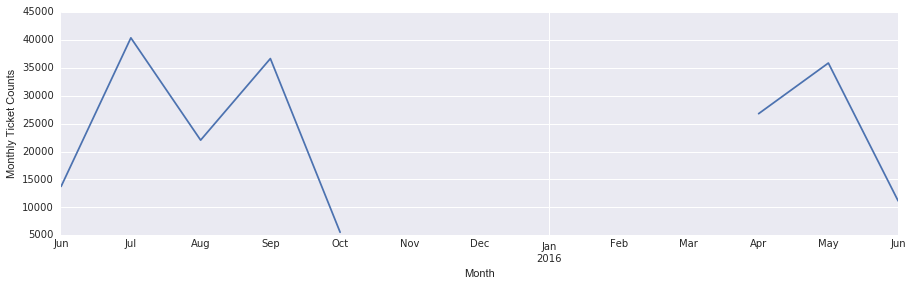

In [747]:
monthly = copy['tickets'].resample('M').sum().plot(figsize = (15, 4))
plt.ylabel('Monthly Ticket Counts')
plt.xlabel('Month')

In [471]:
copy.ix['2015-10-10': '2016-04-11']

,Opponent,Weather,weekday,Price,tickets
Event Date,,,,,
2015-10-10,Nishi Nippon Pirates,Rainy,Sat,827900.50,2942
2016-04-11,Shochiku Robins,Rainy,Mon,553806.03,3177


# Game Season
### 2015-06-15 ~ 2015-10-10  : Fall
### 2016-04-11 ~ 2016-6-15 : Summer

# Holiday


In [472]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2015', '2017')
holidays

DatetimeIndex(['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11',
               '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18',
               '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26'],
              dtype='datetime64[ns]', freq=None)

In [439]:
daily = agg_count.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [442]:
daily[daily['holiday']==1]

,Opponent,Weather,weekday,Price,tickets,holiday
Event Date,,,,,,
2015-07-03,Fukuoka SoftBank Hawks,Cloudy,Fri,327403.21,2617,1.0
2015-09-07,Nishi Nippon Pirates,Cloudy,Mon,406935.85,2972,1.0


### Only 2/85 games happened on national holiday

# Weather

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

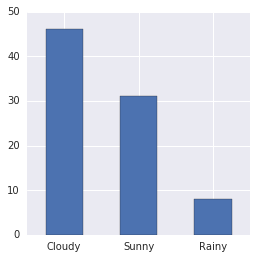

In [298]:
sns.set() #rescue matplotlib's styles from the early '90s
agg_count['Weather'].value_counts().plot.bar(figsize = (4, 4))
plt.xticks(rotation=-360)

# Groupby Opponent Team

In [299]:
agg_count['games_each_team']=1
agg_count.head()

,Event Date,Opponent,Weather,Area,Seat,Price,tickets,games_each_team
0,2015/10/10,Nishi Nippon Pirates,Rainy,10709,25741.0,827900.50,2942,1
1,2015/10/9,Nishi Nippon Pirates,Cloudy,9323,22785.0,647294.01,2583,1
2,2015/6/15,Hiroshima Toyo Carp,Cloudy,5883,15166.0,179941.29,1998,1
3,2015/6/16,Hiroshima Toyo Carp,Cloudy,6338,17423.0,163042.68,2229,1
4,2015/6/26,Nishi Nippon Pirates,Cloudy,8306,18333.0,334437.51,2549,1


In [300]:
aggregated2=agg_count.groupby(['Opponent']).sum().reset_index() 

In [301]:
# average # of tickets sold of each team
aggregated2['average_ticket']=aggregated2['tickets']/aggregated2['games_each_team']

In [302]:
aggregated2.head()

,Opponent,Area,Seat,Price,tickets,games_each_team,average_ticket
0,Chiba Lotte Marines,16175,43946.0,211157.80,6261,4,1565.25
1,Chunichi Dragons,13625,35046.0,377201.86,4506,2,2253.00
2,Daiei Unions,11056,30508.0,169200.83,3835,2,1917.50
3,Fukuoka SoftBank Hawks,34312,89879.0,1096785.59,10924,4,2731.00
4,Hanshin Tigers,10701,28282.0,353565.79,3442,1,3442.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

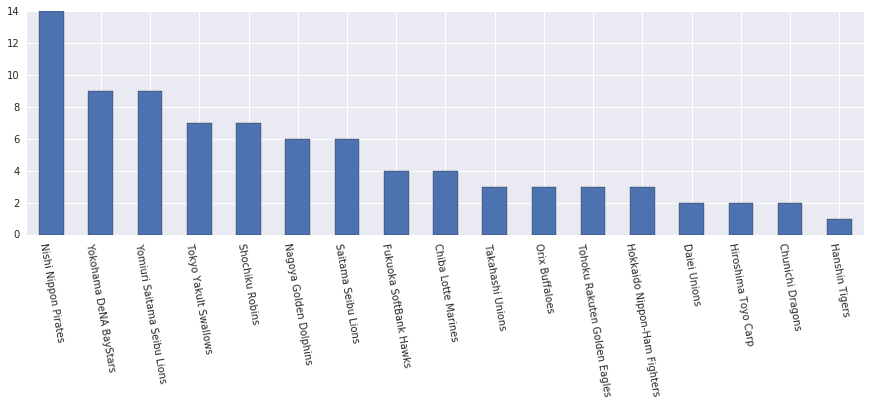

In [303]:
#How many games for each opponent
agg_count['Opponent'].value_counts().plot.bar(figsize = (15, 4))
plt.xticks(rotation=-80)

# Total number of game against each opponent

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

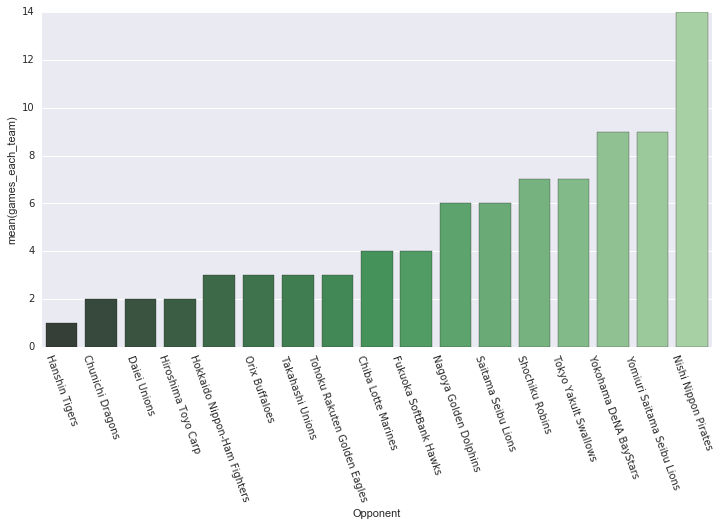

In [305]:
x0=aggregated2[['Opponent','games_each_team']].values
x0=sorted(x0.tolist(),key=lambda x0:x0[1])

plt.figure(figsize = (12, 6))
sns.barplot(x="Opponent", y="games_each_team", data = aggregated2,palette="Greens_d",order=np.array(x0)[:,0])
plt.xticks(rotation=-70)

# Total number of tickets sold against each opponent

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

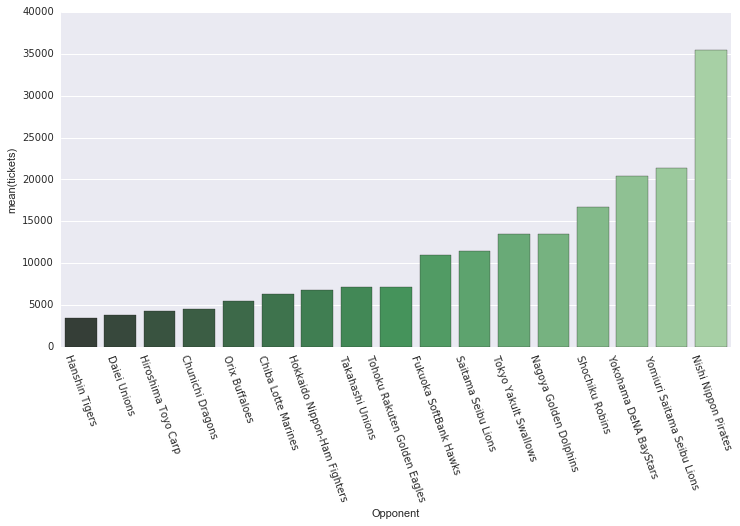

In [306]:
x1=aggregated2[['Opponent','tickets']].values
x1=sorted(x1.tolist(),key=lambda x1:x1[1])

plt.figure(figsize = (12, 6))
sns.barplot(x="Opponent", y="tickets", data = aggregated2,palette="Greens_d",order=np.array(x1)[:,0])
plt.xticks(rotation=-70)

## Hanshin Tigers is the lowest

# Average tickets sold for each opponent 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

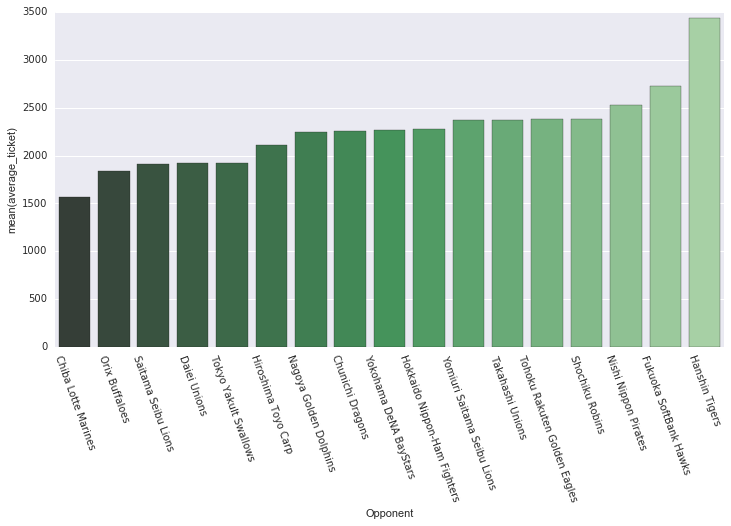

In [308]:
import seaborn as sns
x=aggregated2[['Opponent','average_ticket']].values
x=sorted(x.tolist(),key=lambda x:x[1])

plt.figure(figsize = (12, 6))
sns.barplot(x="Opponent", y="average_ticket", data = aggregated2,palette="Greens_d",order=np.array(x)[:,0])
plt.xticks(rotation=-70)

## Hanshin Tigers is the highest

# 2. Weather

In [313]:
ag = df.groupby('Opponent').Weather.value_counts().sort_index()
#sns.boxplot(x="Opponent", y="total_bill", hue="time", data=df);

In [315]:
ag.unstack()

Weather,Cloudy,Rainy,Sunny
Opponent,,,
Chiba Lotte Marines,2893.0,NaN,3368.0
Chunichi Dragons,4506.0,NaN,NaN
Daiei Unions,NaN,NaN,3835.0
Fukuoka SoftBank Hawks,8510.0,NaN,2414.0
Hanshin Tigers,NaN,NaN,3442.0
Hiroshima Toyo Carp,4227.0,NaN,NaN
Hokkaido Nippon-Ham Fighters,2362.0,NaN,4480.0
Nagoya Golden Dolphins,8575.0,2630.0,2292.0
Nishi Nippon Pirates,27976.0,5177.0,2280.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

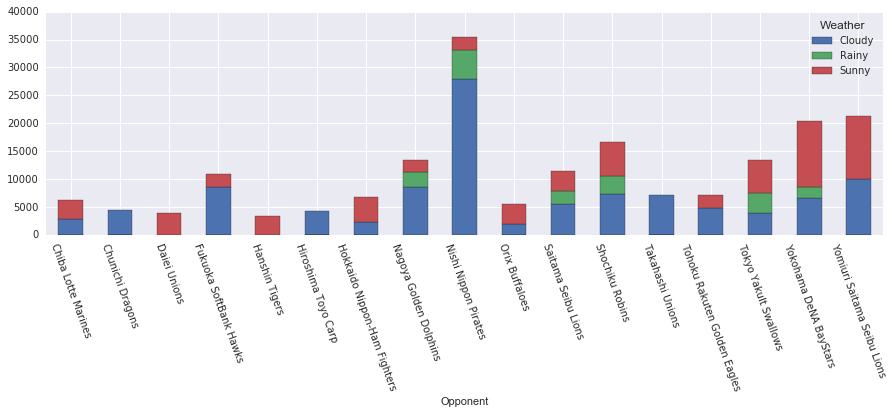

In [318]:
ag.unstack().plot.bar(figsize = (15, 4),stacked=True)
plt.xticks(rotation=-70)

# Area

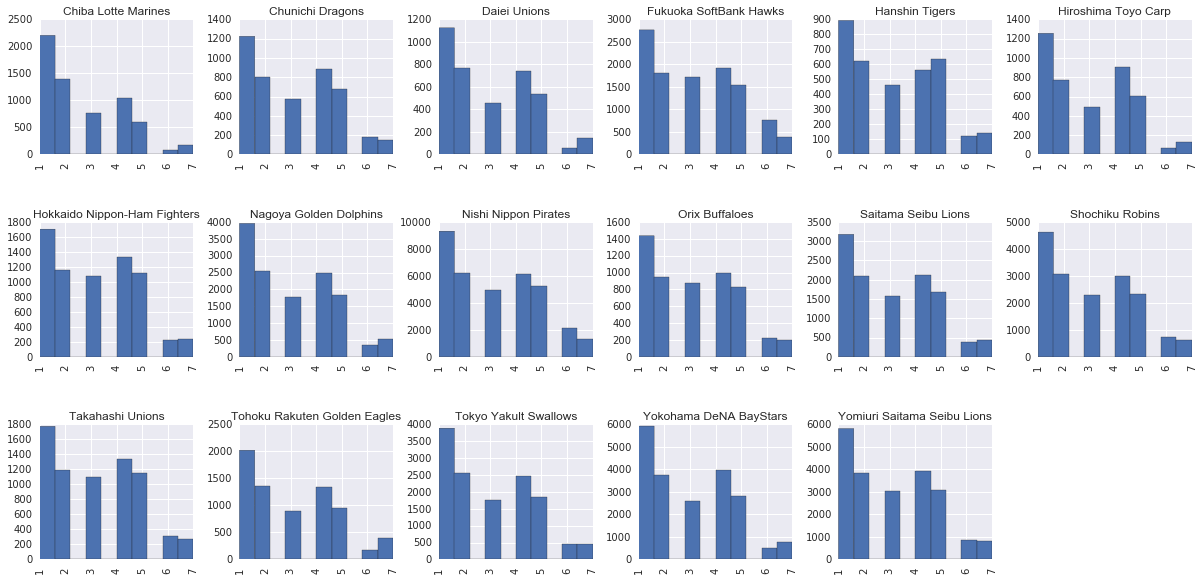

In [320]:
df.hist(by='Opponent',column = 'Area',figsize = (20, 10),layout=(3,6))
plt.show()

# Seat

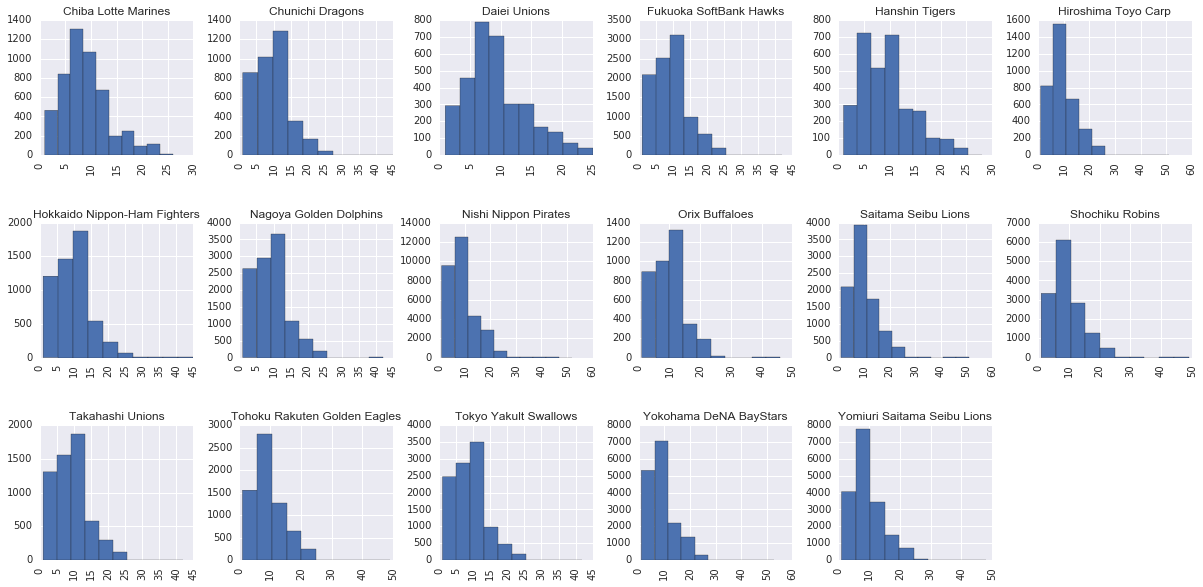

In [322]:
df.hist(by='Opponent',column = 'Seat',figsize = (20, 10),layout=(3,6))
plt.show()